In [2]:
import timeit
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('C:/Users/user2/GEFEST')

from gefest.core.opt.gen_design import design
from gefest.core.utils import project_root
from cases.breakwaters.configuration_de import bw_domain
from gefest.core.viz.struct_vizualizer import StructVizualizer

In [13]:
domain, task_setup = bw_domain.configurate_domain(poly_num=10,
                                                  points_num=50,
                                                  is_closed=False
                                                  )

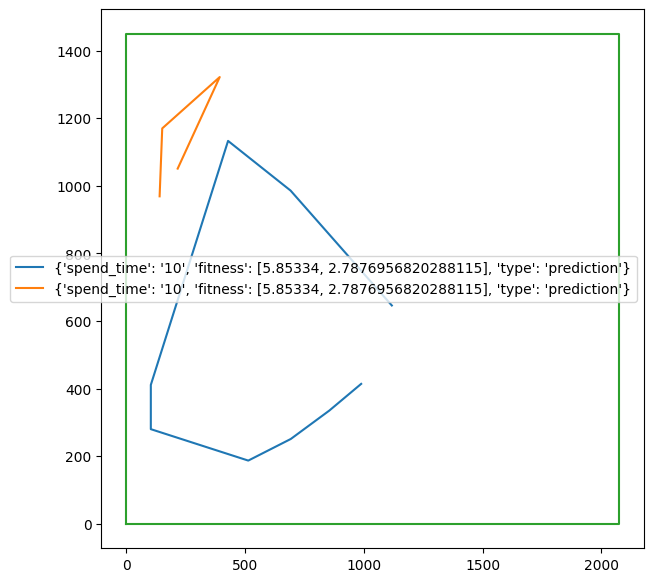

In [12]:


with open(f'HistoryFiles/performance_9.pickle', 'rb') as f:
    performance = pickle.load(f)

with open(f'HistoryFiles/population_9.pickle', 'rb') as f:
    population = pickle.load(f)

idx_of_best = performance.index(min(performance))

visualiser = StructVizualizer(task_setup.domain)
plt.figure(figsize=(7, 7))

info = {'spend_time': '10',
        'fitness': performance[idx_of_best],
        'type': 'prediction'}
visualiser.plot_structure(population[idx_of_best], info)

plt.show()

In [14]:
[i for i,j in performance]

[5.85334,
 5.85334,
 5.85334,
 5.85334,
 5.85334,
 5.85334,
 5.85334,
 5.85334,
 5.85334,
 5.85334]

In [22]:
performance[9][0] = 4.99
performance

[[5, 2.7876956820288115],
 [5.85334, 2.815264780916689],
 [5.85334, 3.0393067538717293],
 [5.85334, 3.627252904311391],
 [5.85334, 3.864264647418543],
 [5.85334, 3.916569868391122],
 [5.85334, 4.071362105873566],
 [5.85334, 4.080761738777337],
 [5.85334, 4.204645580563185],
 [4.99, 4.42032338298314]]

In [23]:
min(performance)

[4.99, 4.42032338298314]

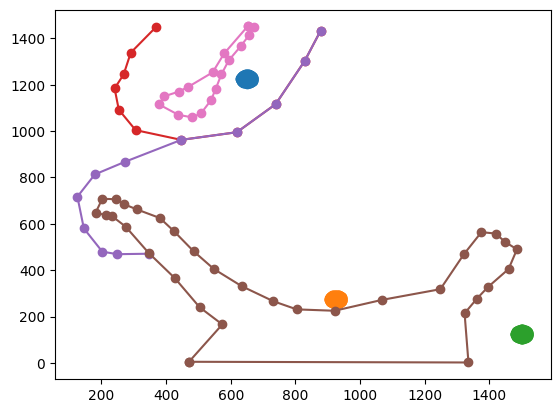

In [218]:
from gefest.core.structure.structure import Structure
str = Structure(domain.prohibited_area.polygons)
str.plot()

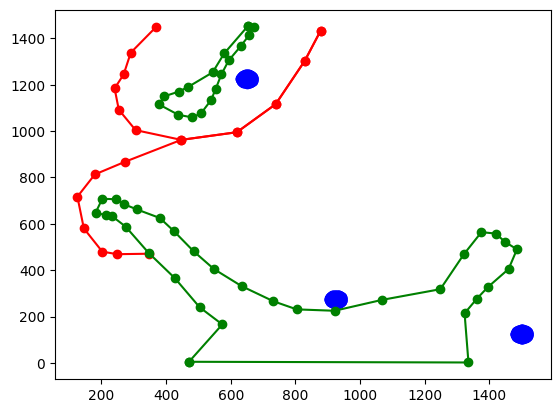

In [224]:
target_points = [point for point in str.polygons if point.id=='prohibited_target']
target_structure = Structure(polygons=target_points)
target_structure.plot(color='b')

prohibited_poly = [poly for poly in str.polygons if poly.id=='prohibited_poly']
prohibited_structure = Structure(polygons=prohibited_poly)
prohibited_structure.plot(color='r')


prohibited_area = [poly for poly in str.polygons if poly.id=='prohibited_area']
prohibited_area = Structure(polygons=prohibited_area)
prohibited_area.plot(color='g')

plt.title

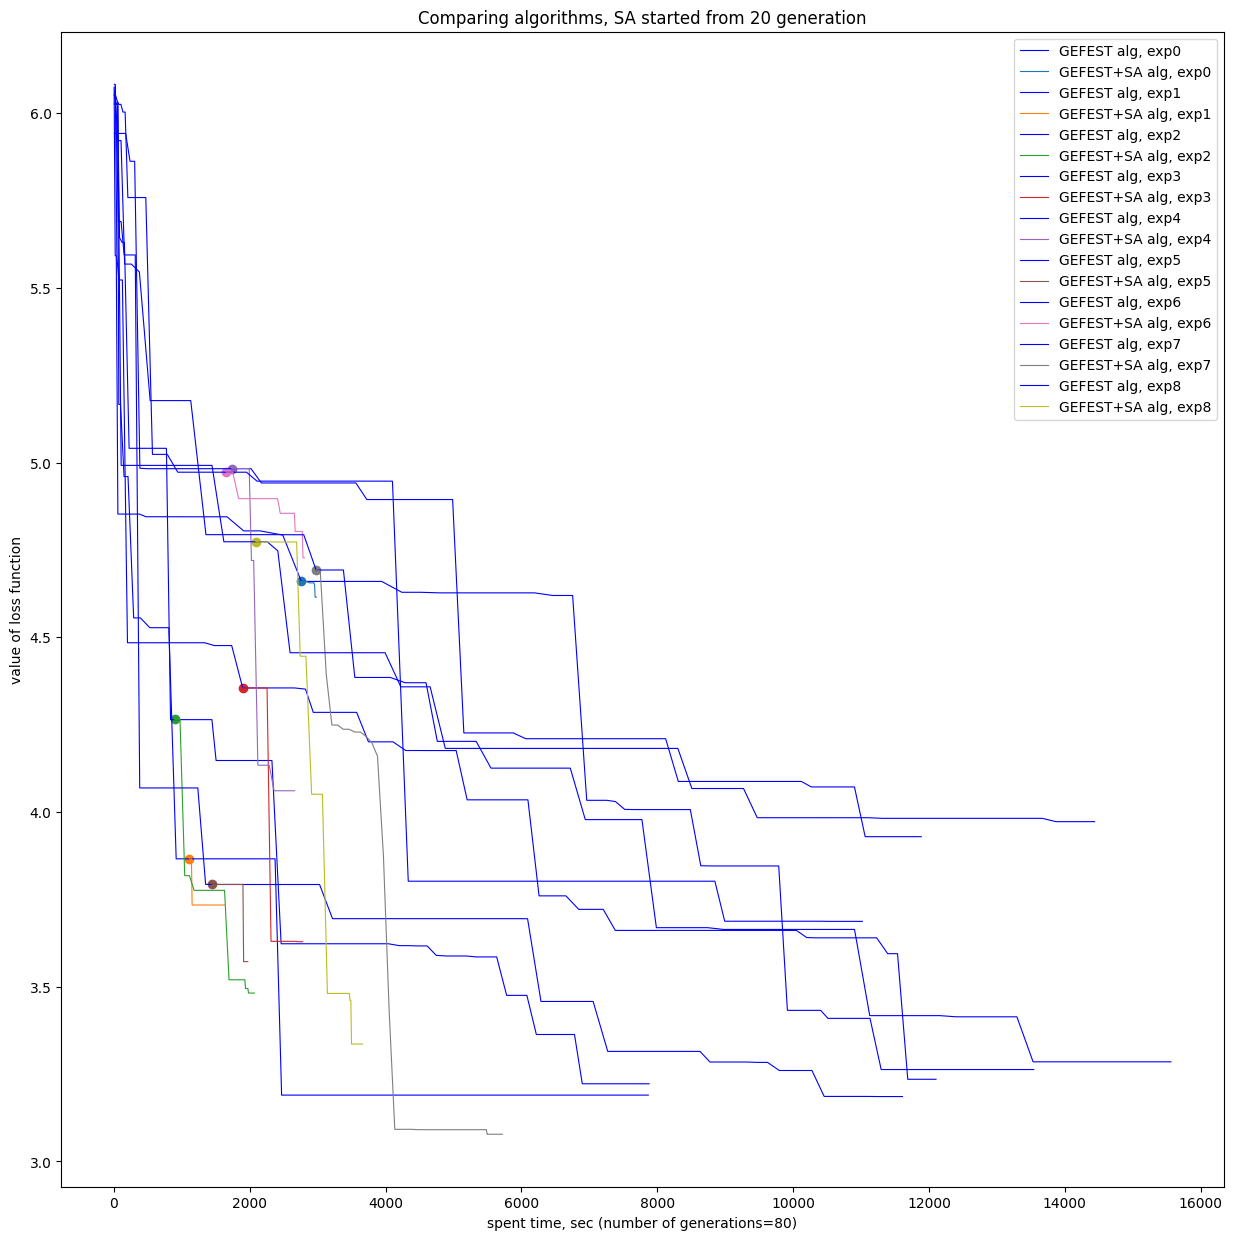

In [251]:
n_exp = list(range(9))
step = 19
evo_times = {}
plt.figure(figsize=(15,15))
for exp in n_exp:
    with open(f'HistorySA/sa_archive_{exp}.pickle', 'rb') as f:
                    archive = pickle.load(f)
                    f.close()
    evo_time_history = archive['evo_time_history']
    evo_times[f'exp_{exp}'] = evo_time_history
    evo_fitnes_history = archive['evo_fitnes_history']

    sa_dict = archive[f'sa_step_{step}']
    sa_time_history = sa_dict[f'sa_time_{step}']
    fitnes = sa_dict[f'sa_fitnes_{step}']

    plt.plot(evo_time_history, evo_fitnes_history, 'b-', label=f'GEFEST alg, exp{exp}', linewidth=0.8)
    plt.plot(sa_time_history, fitnes,'-', label=f'GEFEST+SA alg, exp{exp}', linewidth=0.8)
    plt.scatter(sa_time_history[0], fitnes[0])
plt.title(f'Comparing algorithms, SA started from {step+1} generation')
plt.xlabel(f'spent time, sec (number of generations={80})')
plt.ylabel('value of loss function')
plt.legend()
plt.show()
         

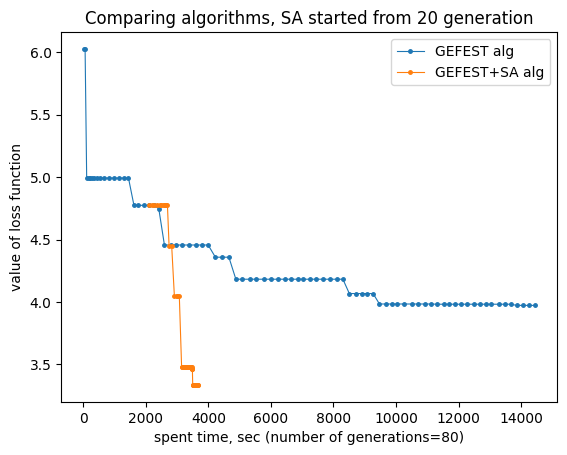

In [253]:
exp=8
step=19
with open(f'HistorySA/sa_archive_{exp}.pickle', 'rb') as f:
                archive = pickle.load(f)
                f.close()
evo_time_history = archive['evo_time_history']
evo_fitnes_history = archive['evo_fitnes_history']

sa_dict = archive[f'sa_step_{step}']
sa_time_history = sa_dict[f'sa_time_{step}']
fitnes = sa_dict[f'sa_fitnes_{step}']

plt.plot(evo_time_history, evo_fitnes_history, '.-', label=f'GEFEST alg', linewidth=0.8, markersize=5)
plt.plot(sa_time_history, fitnes,'.-', label=f'GEFEST+SA alg', linewidth=0.8, markersize=5)
plt.title(f'Comparing algorithms, SA started from {step+1} generation')
plt.xlabel(f'spent time, sec (number of generations={80})')
plt.ylabel('value of loss function')
plt.legend()
plt.show()

In [242]:
exp=4
with open(f'HistorySA/sa_archive_{exp}.pickle', 'rb') as f:
                archive = pickle.load(f)
                f.close()
evo_time_history_0 = archive['evo_time_history']
evo_fitnes_history_0 = archive['evo_fitnes_history']
evo_fitnes_history_0[0] = evo_fitnes_history_0[4]
evo_fitnes_history_0[1]= evo_fitnes_history_0[4]
evo_fitnes_history_0[2]= evo_fitnes_history_0[4]
evo_fitnes_history_0[3]= evo_fitnes_history_0[4]
archive['evo_fitnes_history'] = evo_fitnes_history_0

with open(f'sa_archive_{exp}.pickle', 'wb') as handle:
        pickle.dump(archive, handle, protocol=pickle.HIGHEST_PROTOCOL)


ValueError: List of boxplot statistics and `positions` values must have same the length

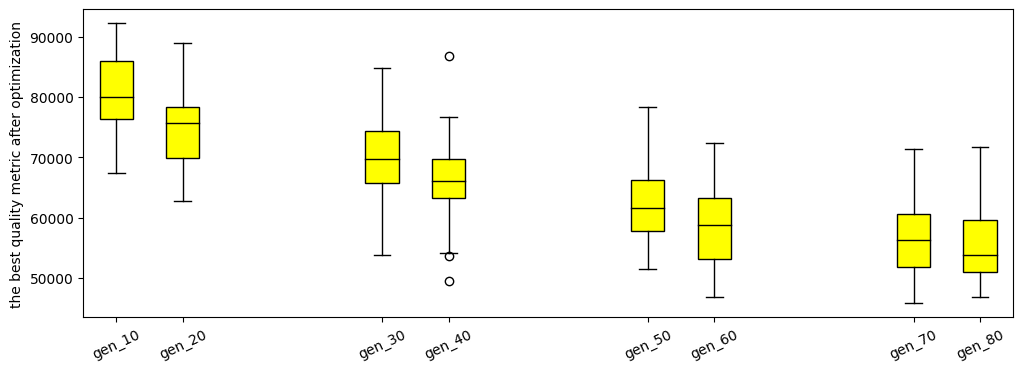

In [209]:
import matplotlib
import random
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# experiments_number = 30
# step_rate = 10
# evo_boxes = []
# for step in range(step_rate-1, 80, step_rate):
#     tmp_box = []
#     for exp in range(experiments_number):
#         with open(f'SA_30exp/sa_archive_{exp}.pickle', 'rb') as f:
#                         archive = pickle.load(f)
#                         f.close()
#         evo_fitnes_history = archive['evo_fitnes_history']
#         evo_fitnes_history = [val*15483*random.uniform(0.92, 1.08) for val in evo_fitnes_history]

#         tmp_box.append(evo_fitnes_history[step])
#     evo_boxes.append(tmp_box)

# evo_sa_boxes = []
# sa_boxes = []


# for step in range(19, 80, 20):
#     tmp_box_evo = []
#     tmp_box_sa = []
#     for exp in range(experiments_number):
#         with open(f'SA_30exp/sa_archive_{exp}.pickle', 'rb') as f:
#                         archive = pickle.load(f)
#                         f.close()
#         evo_fitnes_history = archive['evo_fitnes_history']
#         evo_fitnes_history = [val*15483*random.uniform(0.92, 1.08) for val in evo_fitnes_history]
#         evo_time_history = archive['evo_time_history']

#         sa_history = archive[f'sa_step_{step}']
#         sa_time_history = sa_history[f'sa_time_{step}']
#         sa_fitnes_history = sa_history[f'sa_fitnes_{step}']
#         sa_fitnes_history = [val*15483*random.uniform(0.94, 1.06) for val in sa_fitnes_history]

#         last_point_sa = sa_time_history[-1]
#         last_timepoint_evo = min(evo_time_history, key=lambda x: abs(x-last_point_sa))
#         index_evo_lastpoint = evo_time_history.index(last_timepoint_evo)

#         evo_result = evo_fitnes_history[index_evo_lastpoint]
#         sa_result = sa_fitnes_history[-1]

#         tmp_box_evo.append(evo_result)
#         tmp_box_sa.append(sa_result)

#     evo_sa_boxes.append(tmp_box_evo)
#     sa_boxes.append(tmp_box_sa)

# evo_sa_boxes = evo_sa_boxes[:-1]


fig, ax = plt.subplots(figsize=(12,4))
ax.tick_params(axis='x', labelrotation=25)
ax.set_ylabel('the best quality metric after optimization')
space = 0.3

evo_labels = [f'gen_{i}' for i in range(10,81,10)]
bplot = ax.boxplot(evo_boxes, positions=[0,1,4,5,8,9,12,13], patch_artist=True, labels=evo_labels)
for patch, mediana in zip(bplot['boxes'], bplot['medians']):
    patch.set_facecolor('yellow')
    mediana.set_color('black')

evo_sa_labels = ['GA during SA' for _ in range(len(evo_sa_boxes))]
bplot2 = ax.boxplot(evo_sa_boxes, positions=[2,6,10], patch_artist=True, labels=evo_sa_labels)
for patch, mediana in zip(bplot2['boxes'], bplot2['medians']):
    patch.set_facecolor('lightgreen')
    mediana.set_color('black')

sa_labels = [f'SA {_} gens' for _ in [20,40,60,80]]
bplot3 = ax.boxplot(sa_boxes, positions=[3,7,11,14], patch_artist=True, labels=sa_labels)
for patch, mediana in zip(bplot3['boxes'], bplot3['medians']):
    patch.set_facecolor('pink')
    mediana.set_color('black')
ax.legend([bplot["boxes"][0], bplot2["boxes"][0], bplot3["boxes"][0]], ["Genetic Algorithm (GA)", "GA during SA", "Sensitivity Analysis (SA)"], loc='upper right')
plt.text(2.3, 92000, 'The best structure after [20,40,60,80] generations of evolution:', fontsize=11)
plt.text(6.85, 88000, 'continued to evolve via GA', fontsize=11)
plt.text(6.96, 84000, 'put to Sensitivity Analysis', fontsize=11)


In [172]:
import pandas as pd
import numpy as np
df = pd.DataFrame(columns=[20, '20_var',40, '40_var', 60, '60_var',80, '80_var'], index=['GEFEST', 'SA'])
experiments_number = 30
full_evo = []
full_sa = []
for step in range(19, 80, 20):
    tmp_box_evo = []
    tmp_box_sa = []
    tmp_box_init = []
    for exp in range(experiments_number):
        with open(f'SA_30exp/sa_archive_{exp}.pickle', 'rb') as f:
                        archive = pickle.load(f)
                        f.close()
        evo_fitnes_history = archive['evo_fitnes_history']
        evo_time_history = archive['evo_time_history']

        sa_history = archive[f'sa_step_{step}']
        sa_time_history = sa_history[f'sa_time_{step}']
        sa_fitnes_history = sa_history[f'sa_fitnes_{step}']

        last_point_sa = sa_time_history[-1]
        last_timepoint_evo = min(evo_time_history, key=lambda x: abs(x-last_point_sa))
        index_evo_lastpoint = evo_time_history.index(last_timepoint_evo)

        evo_init = evo_fitnes_history[step]
        evo_result = evo_fitnes_history[index_evo_lastpoint]
        sa_result = sa_fitnes_history[-1]

        tmp_box_evo.append(evo_result)
        tmp_box_sa.append(sa_result)
        tmp_box_init.append(evo_init)

    percent_gefest = []
    
    percent_sa = []
    

    for init,res in zip(tmp_box_init, tmp_box_evo):
        percentage = 100*(init-res)/init
        percent_gefest.append(percentage)
    df.loc['GEFEST'][step+1] = round(np.mean(percent_gefest), 1)
    df.loc['GEFEST'][f'{step+1}_var'] = round(np.std(percent_gefest), 1)

    for init,res in zip(tmp_box_init, tmp_box_sa):
        percentage = 100*(init-res)/init
        percent_sa.append(percentage)
    df.loc['SA'][step+1] = round(np.mean(percent_sa), 1)
    df.loc['SA'][f'{step+1}_var'] = round(np.std(percent_sa), 1)

    full_evo.append(tmp_box_evo)
    full_sa.append(tmp_box_sa)

with open(f'full_evo.pickle', 'wb') as handle:
        pickle.dump(full_evo, handle, protocol=pickle.HIGHEST_PROTOCOL) 

with open(f'full_sa.pickle', 'wb') as handle:
        pickle.dump(full_sa, handle, protocol=pickle.HIGHEST_PROTOCOL)
len(full_evo)

4

In [208]:
import pandas as pd
import numpy as np
df = pd.DataFrame(columns=[20, '20_var',40, '40_var', 60, '60_var',80, '80_var'], index=['GEFEST', 'SA'])
new_evo = [evo_boxes[1], evo_boxes[3], evo_boxes[5], evo_boxes[7]]
evo_sa_boxes[3] = []

for init_evo, evo_res, sa_res, step in zip(new_evo, evo_sa_boxes, sa_boxes, range(19, 81, 20)):
    print(step)
    for init,res in zip(init_evo, evo_res):
        percentage = 100*(init-res)/init
        percent_gefest.append(percentage)
        df.loc['GEFEST'][step+1] = round(np.mean(percent_gefest), 1)
        df.loc['GEFEST'][f'{step+1}_var'] = round(np.std(percent_gefest), 1)

    for init,res in zip(init_evo, sa_res):
        percentage = 100*(init-res)/init
        percent_sa.append(percentage)
        df.loc['SA'][step+1] = round(np.mean(percent_sa), 1)
        df.loc['SA'][f'{step+1}_var'] = round(np.std(percent_sa), 1)

df

19
39
59
79


,20,20_var,40,40_var,60,60_var,80,80_var
GEFEST,3.2,8.2,3.3,8.2,3.2,8.2,NaN,NaN
SA,10.0,10.8,10.1,10.8,9.9,10.8,9.6,10.8


In [206]:
len(new_evo)

4

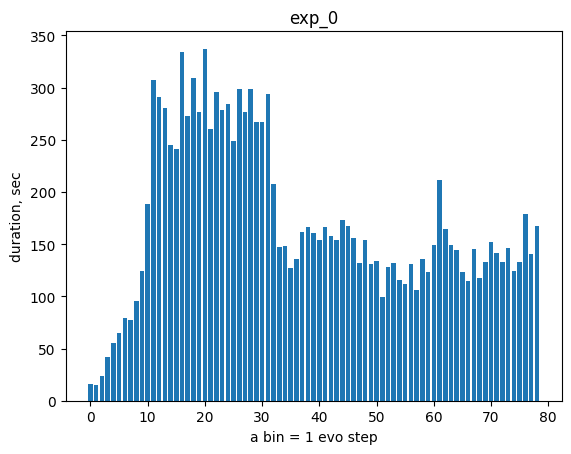

In [186]:
name_experiment = 'exp_0'
evo_0 = evo_times[name_experiment]
evo_diff_0 = []
for i in range(len(evo_0)-1):
    diff = evo_0[i+1] - evo_0[i]
    evo_diff_0.append(diff)

plt.bar(x=list(range(len(evo_diff_0))), height=evo_diff_0)
plt.gca().set(title=f'{name_experiment}', ylabel='duration, sec', xlabel='a bin = 1 evo step');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

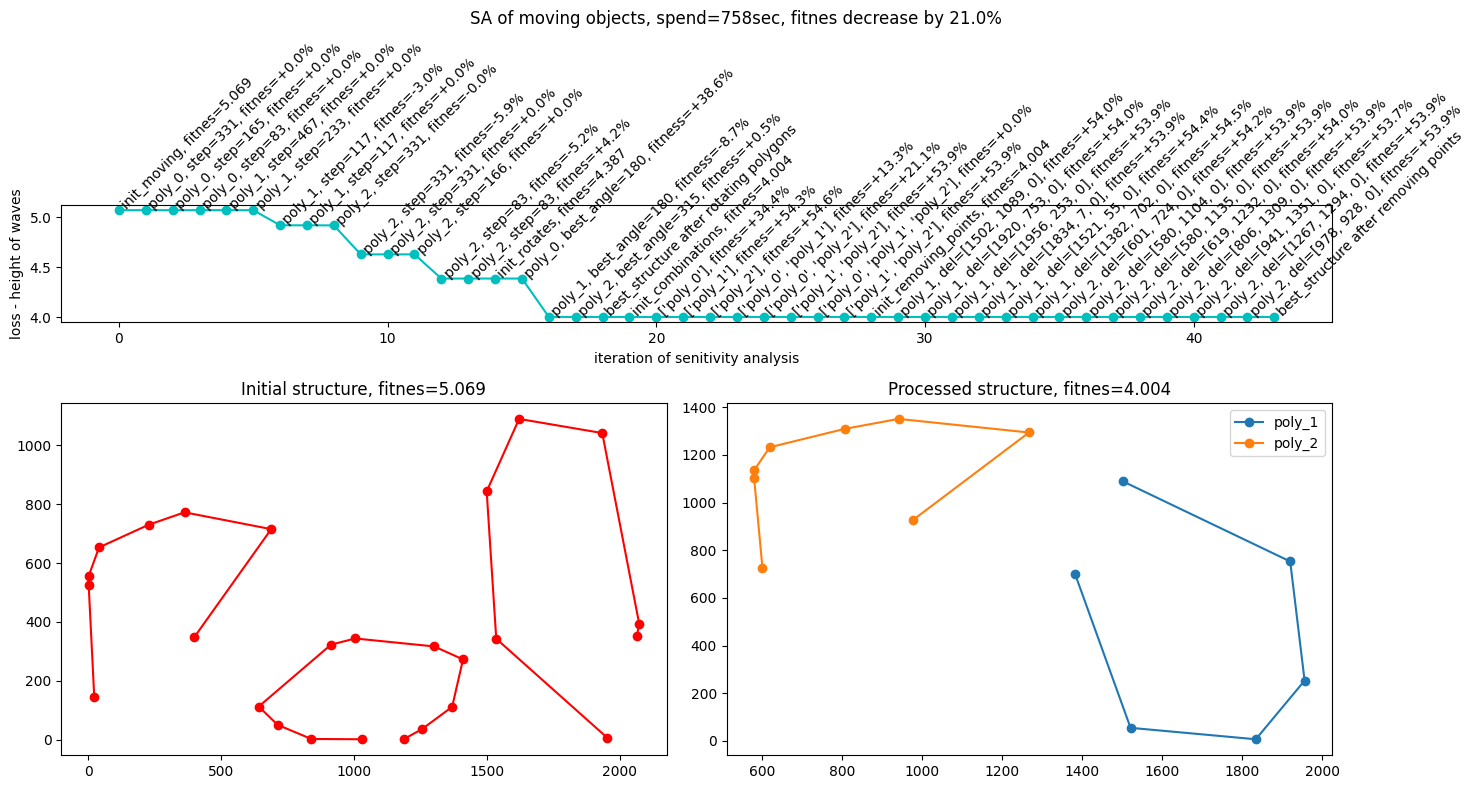

In [98]:
exp = 0
step_sa = 19
with open(f'HistorySA/sa_archive_{exp}.pickle', 'rb') as f:
                archive = pickle.load(f)
                f.close()

initial_strucutre = archive[f'sa_step_{step_sa}'][f'initial_structure_{step_sa}']
optimized_structure = archive[f'sa_step_{step_sa}'][f'sa_structures_{step_sa}'][-1]
descriptions = archive[f'sa_step_{step_sa}'][f'sa_step_description_{step_sa}']

x= list(range(len(descriptions)))
y= archive[f'sa_step_{step_sa}'][f'sa_fitnes_{step_sa}']

start = archive[f'sa_step_{step_sa}'][f'sa_time_{step_sa}'][0]
end = archive[f'sa_step_{step_sa}'][f'sa_time_{step_sa}'][-1]
spend_time = round(end-start)

fitnes = archive[f'sa_step_{step_sa}'][f'sa_fitnes_{step_sa}']
start_fit = archive[f'sa_step_{step_sa}'][f'sa_fitnes_{step_sa}'][0]
end_fit = archive[f'sa_step_{step_sa}'][f'sa_fitnes_{step_sa}'][-1]
fitnes_difference = round(100*(start_fit - end_fit)/start_fit, 1)

fig, axd = plt.subplot_mosaic([['upper', 'upper'],
                                    ['lower left', 'lower right']],
                                    figsize=(15, 8), height_ratios=[1, 3])

fig.suptitle(f'SA of moving objects, spend={spend_time}sec, fitnes decrease by {fitnes_difference}%')

initial_strucutre.plot(color = 'r', ax=axd['lower left'], legend=True)
axd['lower left'].set_title(f'Initial structure, fitnes={round(fitnes[0], 3)}')
optimized_structure.plot(ax=axd['lower right'], legend=True)
axd['lower right'].set_title(f'Processed structure, fitnes={round(fitnes[-1], 3)}')

axd['upper'].plot(fitnes, c='c')
axd['upper'].scatter(x,y, marker='o', c='c')
for idx,text in enumerate(descriptions):
    axd['upper'].annotate(text, (x[idx]+0.01, y[idx]+0.01), rotation=45.0)
axd['upper'].set_xlabel('iteration of senitivity analysis')
axd['upper'].set_ylabel('loss - height of waves')

fig.tight_layout()
plt.legend()
plt.plot()

[1502.0, 1920.0, 1956.0, 1834.0, 1521.0, 1382.0]
[1089.0, 753.0, 253.0, 7.0, 55.0, 702.0]
[601.1, 580.1, 580.1, 619.1, 806.1, 941.1, 1267.1, 978.1]
[724.1, 1104.1, 1135.1, 1232.1, 1309.1, 1351.1, 1294.1, 928.1]


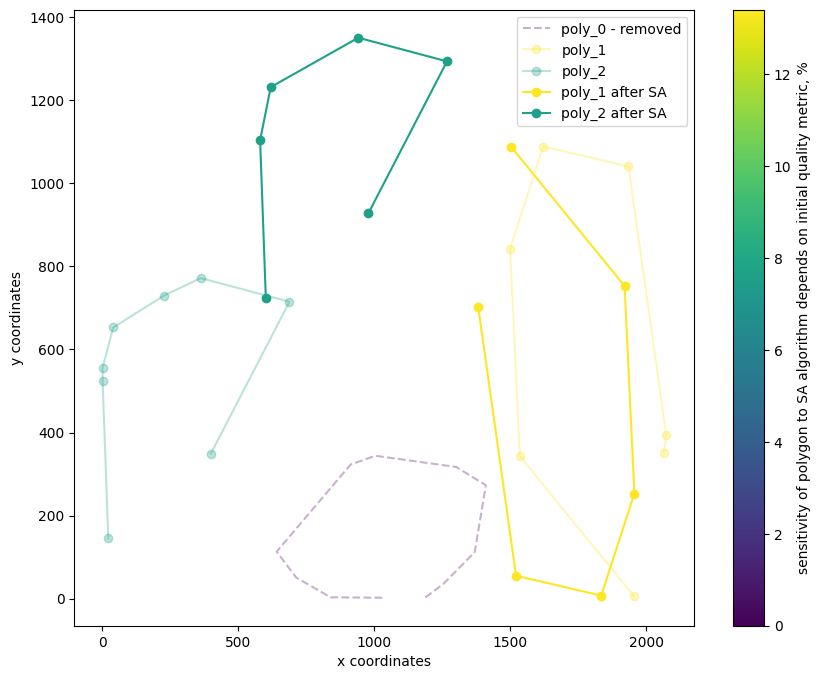

In [160]:
from gefest.core.structure.structure import Structure
import matplotlib
plt.rcParams["figure.figsize"] = (10,8)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

exp = 0
step_sa = 19
with open(f'HistorySA/sa_archive_{exp}.pickle', 'rb') as f:
                archive = pickle.load(f)
                f.close()

initial_strucutre = archive[f'sa_step_{step_sa}'][f'initial_structure_{step_sa}']

descriptions = archive[f'sa_step_{step_sa}'][f'sa_step_description_{step_sa}']

x= list(range(len(descriptions)))
y= archive[f'sa_step_{step_sa}'][f'sa_fitnes_{step_sa}']

start = archive[f'sa_step_{step_sa}'][f'sa_time_{step_sa}'][0]
end = archive[f'sa_step_{step_sa}'][f'sa_time_{step_sa}'][-1]
spend_time = round(end-start)

fitnes = archive[f'sa_step_{step_sa}'][f'sa_fitnes_{step_sa}']
start_fit = archive[f'sa_step_{step_sa}'][f'sa_fitnes_{step_sa}'][0]
end_fit = archive[f'sa_step_{step_sa}'][f'sa_fitnes_{step_sa}'][-1]
fitnes_difference = round(100*(start_fit - end_fit)/start_fit, 1)

fig, ax = plt.subplots()
fitnes_changes = [0, 13.4, 7.6]

from matplotlib import cm
norm = matplotlib.colors.Normalize(vmin=0, vmax=13.4)


for polygon, fitnes in zip(initial_strucutre.polygons, fitnes_changes):
    x = [point._x for point in polygon.points]
    y = [point._y for point in polygon.points]
    if polygon.id == "poly_0":
        ax.plot(x, y, linestyle='dashed', label=f'{polygon.id} - removed', alpha=0.3, color=cm.viridis(norm(fitnes)))
    else:
        ax.plot(x, y, label=polygon.id, marker='o', alpha=0.3, color=cm.viridis(norm(fitnes)))

optimized_structure = archive[f'sa_step_{step_sa}'][f'sa_structures_{step_sa}'][-1]

for polygon, fitnes in zip(optimized_structure.polygons, fitnes_changes[1:]):
    x = [round(point._x, 1) for point in polygon.points]
    print(x)
    y = [round(point._y, 1) for point in polygon.points]
    print(y)
    if polygon.id == "poly_2":
        x.pop(2)
        x.pop(3)
        y.pop(2)
        y.pop(3)
    ax.plot(x, y, label=f'{polygon.id} after SA', marker='o',color=cm.viridis(norm(fitnes)))
# plt.show()
    # dif_struct.id = f'{dif_struct.id} - {label}'
    # new_local_struct = Structure(polygons=[dif_struct])
    # new_local_struct.plot(legend=True, color=color)
# optimized_pop.plot(legend=True, color=color2)
# plt.title(f'Analysis of Structure received by GA, spent={spend_time} sec, fitnes decrease by {fitnes_difference}%')
im = ax.get_children()
# fig.colorbar(im, cmap=cm.viridis, norm=norm)
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'),
             ax=ax,
             label='sensitivity of polygon to SA algorithm depends on initial quality metric, %')

# import matplotlib.pylab as pylab


# col_labels=['poly_o','poly_1','poly_2']
# row_labels=['move','rotate','find combo', 'rebuild']
# table_vals=[['-10.5', -7.3, 0],['0 (+10.9)', '0 (+14.3)', '0 (0)'],['0 (+42.1)','0 (+40.5)', '0 (0)'], [-0.2, -14.1, 0]]
# # the rectangle is where I want to place the table
# the_table = pylab.table(cellText=table_vals,
#                   colWidths = [0.15]*3,
#                   rowLabels=row_labels,
#                   colLabels=col_labels,
#                   loc='center right',
#                   )
# pylab.text(1150,805,'Change fitnes, %',size=10)


plt.xlabel('x coordinates')
plt.ylabel('y coordinates')
plt.legend()
plt.show()

AttributeError: 'list' object has no attribute 'get_array'

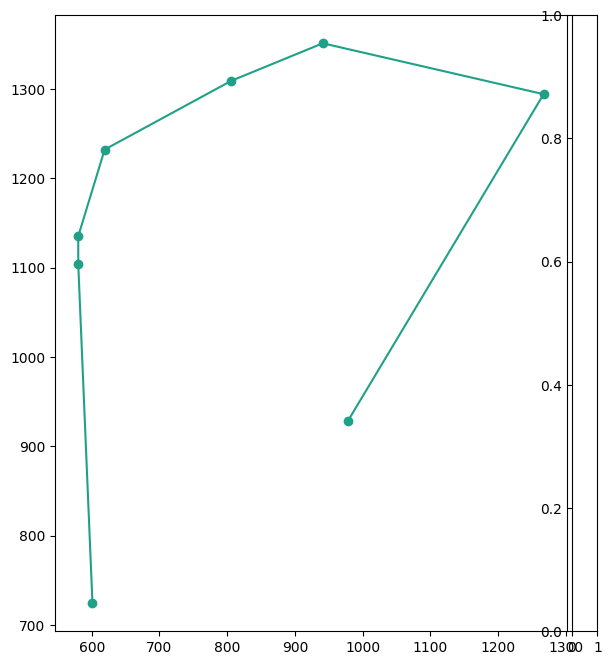

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

data = np.arange(100, 0, -1).reshape(10, 10)

fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)


im = ax.plot(x, y, label=f'{polygon.id} after SA', marker='o',color=cm.viridis(norm(fitnes)))

fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

In [150]:
ax.get_children()

 Text(0.5, 1.0, 'Analysis of Structure received by GA, spent=758 sec, fitnes decrease by 21.0%'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

[[0.12156863 0.46666667 0.70588235 1.        ]]
[[0.12156863 0.46666667 0.70588235 1.        ]]
[[0.12156863 0.46666667 0.70588235 1.        ]]
[[0.12156863 0.46666667 0.70588235 1.        ]]


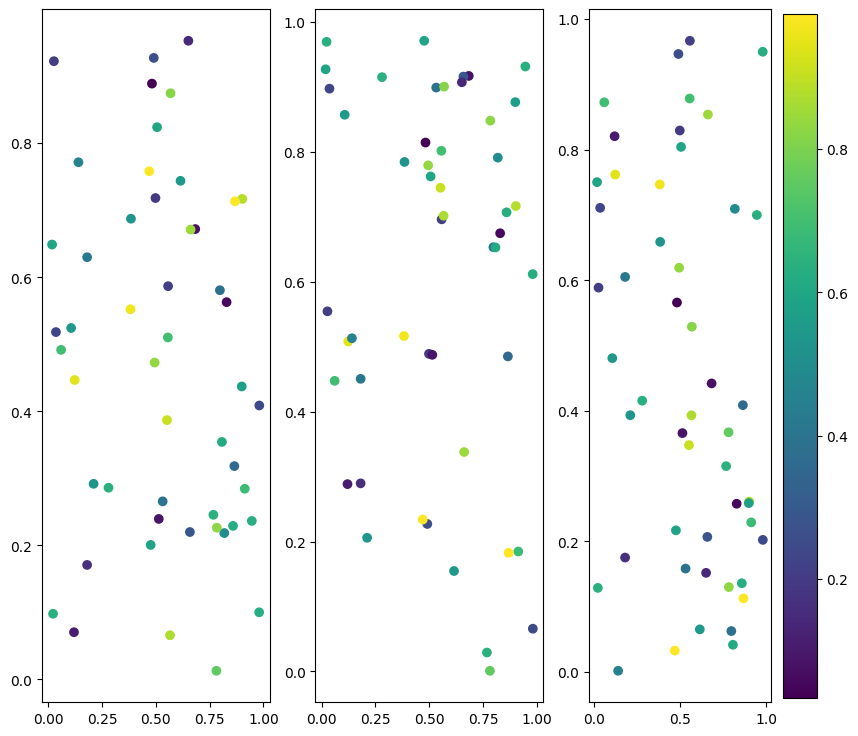

In [129]:
import numpy as np
import matplotlib.pyplot as plt

time, x, p, q, r = np.random.random((5, 50))

fig, axes = plt.subplots(ncols=3)
for ax, y in zip(axes.flat, [p,q,r]):
    # "s=150" indicates a markersize of 15 points (blame matlab)
    scat = ax.scatter(x, y, c=time)
    print(scat.get_edgecolor())
fig.colorbar(scat)
print(scat.get_edgecolor())
plt.show()

In [109]:
exp = 3
with open(f'HistorySA/sa_archive_{exp}.pickle', 'rb') as f:
                archive = pickle.load(f)
                f.close()

optimized_pop = archive['sa_step_19']['initial_structure_19']
descriptions = archive['sa_step_19']['sa_step_description_19']

x= list(range(len(descriptions)))
y= archive['sa_step_19']['sa_fitnes_19']

start = archive['sa_step_19']['sa_time_19'][0]
end = archive['sa_step_19']['sa_time_19'][-1]
spend_time = round(end-start)

fitnes = archive['sa_step_19']['sa_fitnes_19']
start_fit = archive['sa_step_19']['sa_fitnes_19'][0]
end_fit = archive['sa_step_19']['sa_fitnes_19'][-1]
fitnes_difference = round(100*(start_fit - end_fit)/start_fit, 1)

import matplotlib
plt.rcParams["figure.figsize"] = (10,9)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


fitnes_changes = [55,18, 0]
colors = ['#921124', '#f22525', '#370a11']
labels = ['susceptible', 'most susceptible', 'not susceptible']
from gefest.core.structure.structure import Structure
for polygon, fitnes in zip(optimized_pop.polygons, fitnes_changes):
    x = [point._x for point in polygon.points]
    y = [point._y for point in polygon.points]
    color = [fitnes for _ in range(len(x))]

    scat = ax.scatter(x, y, label=polygon.id, c=color, marker='o')
    fig.colorbar(scat)
plt.show()

In [7]:
a= [1,2,3,4]
b = [2,3,4,5]

c = [a*b for a,b in zip(a,b)]
c

[2, 6, 12, 20]

In [162]:
a = [1,2,3]
b=a
c=b
my_last_list = c
c[0]=3
print(f'list a:{a}')
print(f'list b:{b}')
print(f'list b:{c}')
print(f'list b:{my_last_list}')

list a:[3, 2, 3]
list b:[3, 2, 3]
list b:[3, 2, 3]
list b:[3, 2, 3]


In [9]:
c.append(c[1])

In [11]:
with open(f'HistorySA/sa_archive_{exp}.pickle', 'rb') as f:
                archive = pickle.load(f)
                f.close()
archive.keys()

dict_keys(['evo_time_history', 'evo_fitnes_history', 'sa_step_19', 'sa_step_39', 'sa_step_59', 'sa_step_79'])

In [12]:
archive['sa_step_79'].keys()

dict_keys(['initial_structure_79', 'sa_fitnes_79', 'sa_structures_79', 'sa_step_description_79', 'sa_time_79'])

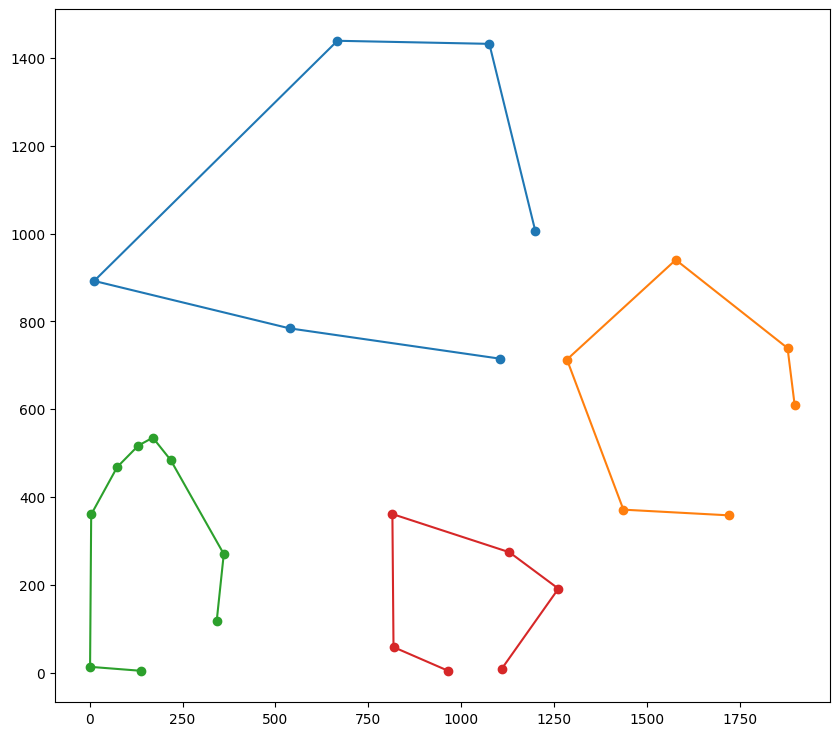

In [21]:
archive['sa_step_19']['initial_structure_19'].plot()

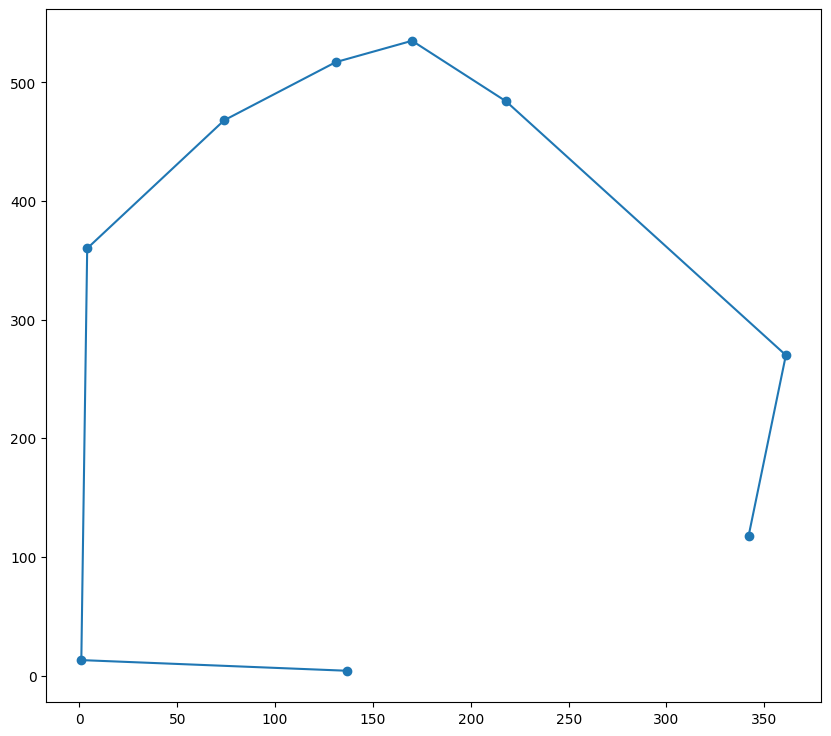

In [22]:
archive['sa_step_19']['sa_structures_19'][-1].plot()

In [51]:
current_fitnes = 5.6
real_fitnes=[100,250,5.6,85,5.6,8]

best_indexes = [i for i,x in enumerate(real_fitnes) if x <= current_fitnes]
best_indexes

[2, 4]

In [52]:
length_strcuture = [23,46,24,8645,654,3]

struct_lengths = {idx: length_strcuture[idx] for idx in best_indexes}
best_index = min(struct_lengths, key=struct_lengths.get)
best_index

2

In [29]:
name_list = ['Barbara', 'Anna', 'Chloe', 'Debora']
age_list = [31, 31, 45, 50]
addition_list = [31, 32, 48, 50]
example_dict = list(zip(name_list,age_list, addition_list))
example_dict.sort(key = lambda x : x[2])

In [55]:
example_dict[2]

('Chloe', 45, 48)

In [53]:
from gefest.core.structure.structure import get_random_structure
from gefest.core.structure.domain import Domain
from copy import deepcopy

domain = Domain()


structure = get_random_structure(domain)
tmp_structure = deepcopy(structure)

for poly in structure.polygons:
    tmp_poly = deepcopy(poly)
    for point in poly.points:
        if point == tmp_poly.points[1]:
            tmp_points = tmp_poly.points
            # print('before:', tmp_points)
            tmp_points.remove(point)
            # print('after:', tmp_points)
            tmp_poly.points = tmp_points
    print(len(poly.points))
    print(len(tmp_poly.points))


8
1
10
1


In [40]:
for poly_number, polygon in enumerate(structure.polygons):
            if len(polygon.points) > 2:
                closed = bool(polygon.points[0] == polygon.points[-1])

                if closed:
                    exploring_polygon = deepcopy(polygon)
                    for idx_point in range(1, len(polygon.points)):
                        # exploring_polygon = deepcopy(polygon)
                        tmp_structure = deepcopy(structure)

                        exploring_point_coords = tmp_structure.polygons[poly_number].points[idx_point].coords()
                        exploring_polygon.points.pop(idx_point)
                        tmp_structure.polygons[poly_number] = exploring_polygon

                        fitnes = round(self.cost([tmp_structure])[0], 3)
                        fitnes_diff = round(100 * ((fitnes - current_fitnes)/current_fitnes), 1)

                        if fitnes <= current_fitnes:
                            current_fitnes = fitnes
                            
                            structure_history.append(tmp_structure)
                            fitnes_history.append(fitnes)
                            polygon_history.append(f'{str(polygon.id)}, del={str(exploring_point_coords)}, fitnes={str(fitnes_diff)}%')
                        else:
                            structure_history.append(tmp_structure)
                            fitnes_history.append(current_fitnes)
                            polygon_history.append(f'{str(polygon.id)}, del={str(exploring_point_coords)}, fitnes=+{str(fitnes_diff)}%')
                        end_step_time = time.time()
                        self.sa_time_history.append(end_step_time - self.start_time)

                else:
                    for idx, point in enumerate(polygon.points):
                        exploring_polygon = deepcopy(polygon)
                        tmp_structure = deepcopy(structure)

                        exploring_point_coords = point.coords()
                        exploring_polygon.points.pop(idx)
                        tmp_structure.polygons[poly_number] = exploring_polygon

                        fitnes = round(self.cost([tmp_structure])[0], 3)
                        fitnes_diff = round(100 * ((fitnes - current_fitnes)/current_fitnes), 1)

                        if fitnes < current_fitnes:
                            current_fitnes = fitnes
                            structure_history.append(tmp_structure)
                            fitnes_history.append(fitnes)
                            polygon_history.append(f'{str(polygon.id)}, del={str(exploring_point_coords)}, fitnes={str(fitnes_diff)}%')
                        else:
                            structure_history.append(tmp_structure)
                            fitnes_history.append(current_fitnes)
                            polygon_history.append(f'{str(polygon.id)}, del={str(exploring_point_coords)}, fitnes=+{str(fitnes_diff)}%')
                        end_step_time = time.time()
                        self.sa_time_history.append(end_step_time - self.start_time)
        
        best_fitnes = min(fitnes_history)
        best_idx = fitnes_history.index(best_fitnes)
        best_structure = structure_history[best_idx]

        fitnes_history.append(best_fitnes)
        structure_history.append(best_structure)
        polygon_history.append(f'best_structure after removing points')
        end_step_time = time.time()